# **Data Preparation**

In [ ]:
from google.colab import drive
drive. mount('/drive',force_remount = True)

Mounted at /drive


In [ ]:
import pandas as pd
df_original = pd.read_csv('/drive/MyDrive/INF2178/Sources/INF2178_A4_data.csv')
df_original.head(5)

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


# **Exploratory Data Analysis**

In [ ]:
print(df_original.isnull().sum())  # Check for missing values

Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [ ]:
# clean the missing value in MMSE
df = df_original.dropna(subset=['MMSE'])
df.head(2)
print(df.isnull().sum())

Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           14
MMSE           0
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [ ]:
%pip install dfply
from dfply import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 6.9 MB/s eta 0:00:00


In [ ]:
# Summary statistics of the MMSE by group
df.groupby(['Visit', 'Group'])['MMSE'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                   
1     Converted    29.36  0.93
      Demented     25.33  3.32
      Nondemented  29.19  0.85
2     Converted    28.00  2.09
      Demented     24.25  4.40
      Nondemented  29.11  0.96

In [ ]:
# Summary statistics of the nWBV by group
df.groupby(['Visit', 'Group'])['nWBV'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                  
1     Converted    0.74  0.03
      Demented     0.72  0.03
      Nondemented  0.75  0.04
2     Converted    0.73  0.04
      Demented     0.71  0.03
      Nondemented  0.74  0.04

In [ ]:
# Check for balance in number of observations per group and per subject across visits
print(df.groupby(['Group', 'Visit'])['Subject ID'].count())

Group        Visit
Converted    1        14
             2        12
Demented     1        64
             2        61
Nondemented  1        72
             2        70
Name: Subject ID, dtype: int64


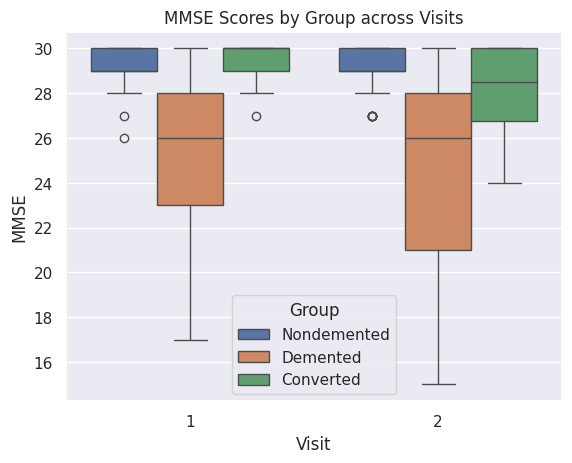

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df, x='Visit', y='MMSE', hue='Group')
plt.title('MMSE Scores by Group across Visits')
plt.show()

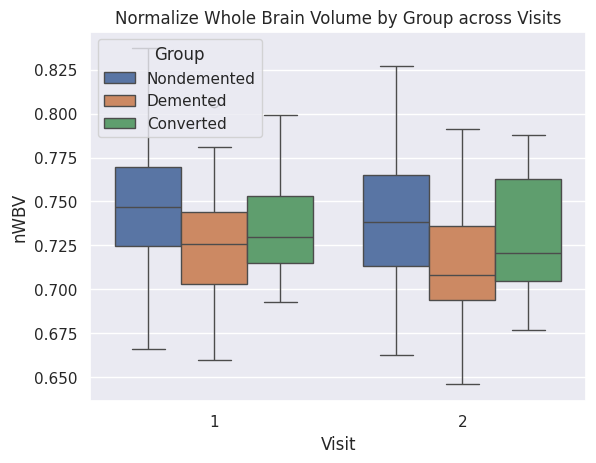

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df, x='Visit', y='nWBV', hue='Group')
plt.title('Normalize Whole Brain Volume by Group across Visits')
plt.show()

<ipython-input-36-a064da119e7a>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Visit', y='MMSE', hue='Group', dodge=True, markers=['o', 's','d'],


<Axes: xlabel='Visit', ylabel='MMSE'>

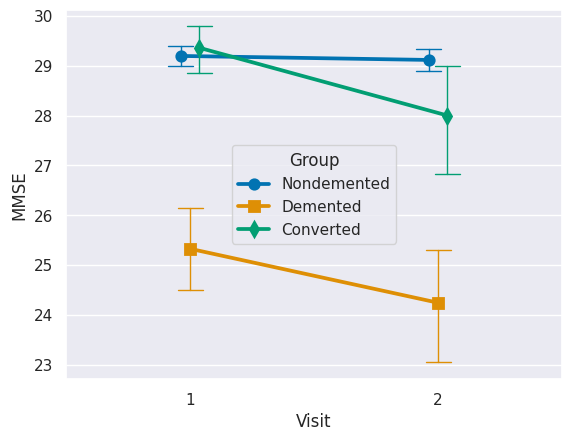

In [ ]:
sns.set()
sns.pointplot(data=df, x='Visit', y='MMSE', hue='Group', dodge=True, markers=['o', 's','d'],
	      capsize=.1, errwidth=1, palette='colorblind')

<ipython-input-38-9a439c5ea434>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Visit', y='nWBV', hue='Group', dodge=True, markers=['o', 's','d'],


<Axes: xlabel='Visit', ylabel='nWBV'>

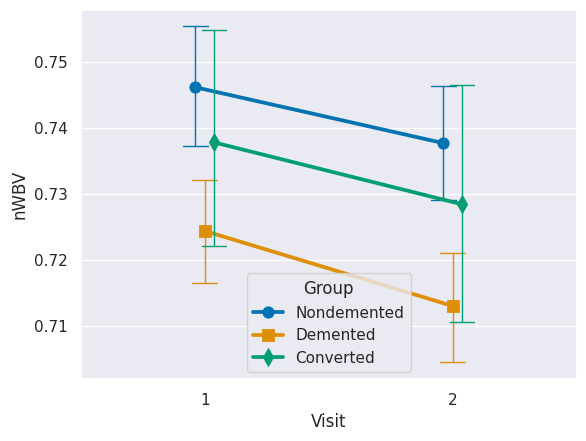

In [ ]:
sns.set()
sns.pointplot(data=df, x='Visit', y='nWBV', hue='Group', dodge=True, markers=['o', 's','d'],
	      capsize=.1, errwidth=1, palette='colorblind')

# **Mixed effects ANOVA**

In [ ]:
!pip install pingouin
import pingouin as pg

**Two-way mixed-design ANOVA - Model 1 for MMSE**

In [ ]:
# two-way mixed-design ANOVA - Model 1 for MMSE
aov = pg.mixed_anova(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source             SS    DF1    DF2       MS       F    p-unc    np2      eps
-----------  --------  -----  -----  -------  ------  -------  -----  -------
Group        1328.421      2    140  664.211  56.212    0.000  0.445  nan
Visit          22.378      1    140   22.378   8.859    0.003  0.060    1.000
Interaction    17.000      2    140    8.500   3.365    0.037  0.046  nan



**Model 1 - post-hoc test**

In [ ]:
# post-hoc test
posthocs = pg.pairwise_ttests(dv='MMSE', within='Visit', between='Group',
                              subject='Subject ID', data=df)
pg.print_table(posthocs)


POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  ------------------  --------
Visit          -        1          2            True      True           2.928  142.000  two-sided        0.004               5.530     0.162
Group          -        Converted  Demented     False     True           6.739   51.065  two-sided        0.000         2036000.000     1.167
Group          -        Converted  Nondemented  False     True          -1.303   12.315  two-sided        0.216               0.599    -0.584
Group          -        Demented   Nondemented  False     True          -9.449   64.318  two-sided        0.000  22070000000000.000    -1.754
Visit * Group  1        Converted  Demented     False     True           8.012   60.516  two-sided        0.000       318700000.000

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


**Two-way mixed-design ANOVA - Model 2 for nWBV**

In [ ]:
# two-way mixed-design ANOVA - Model 2 for nWBV
aov = pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df)
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.034      2    140  0.017   6.800    0.002  0.089  nan
Visit        0.007      1    140  0.007  97.523    0.000  0.411    1.000
Interaction  0.000      2    140  0.000   1.786    0.171  0.025  nan



**Model 2 - Post-hoc test**


In [ ]:
# post-hoc test
posthocs = pg.pairwise_ttests(dv='nWBV', within='Visit', between='Group',
                              subject='Subject ID', data=df)
pg.print_table(posthocs)


POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                 BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  -------------------  --------
Visit          -        1          2            True      True           9.821  142.000  two-sided        0.000  505100000000000.000     0.257
Group          -        Converted  Demented     False     True           1.426   14.781  two-sided        0.175                0.688     0.476
Group          -        Converted  Nondemented  False     True          -0.648   15.832  two-sided        0.527                0.361    -0.188
Group          -        Demented   Nondemented  False     True          -3.718  128.746  two-sided        0.000               81.736    -0.639
Visit * Group  1        Converted  Demented     False     True           1.454   14.748  two-sided        0.167              

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


**Statistical Power for t-test**

In [ ]:
# import required modules
from math import sqrt
from statsmodels.stats.power import TTestIndPower

In [ ]:
obj = TTestIndPower()
n = obj.solve_power(effect_size=0.7, alpha=0.05, power=0.91,
					ratio=1, alternative='two-sided')
print('Sample size/Number needed in each group: {:.3f}'.format(n))

Sample size/Number needed in each group: 45.451


In [ ]:
from statsmodels.stats.power import TTestPower

# Initialize TTestPower
power_analysis = TTestPower()

# Define parameters
effect_size = 0.7
alpha = 0.05
sample_size = 50  # Assuming equal sample sizes in both groups

# Calculate power
power = power_analysis.power(effect_size=effect_size, nobs=sample_size, alpha=alpha, alternative='two-sided')

print("Power:", power)


Power: 0.998078296963782


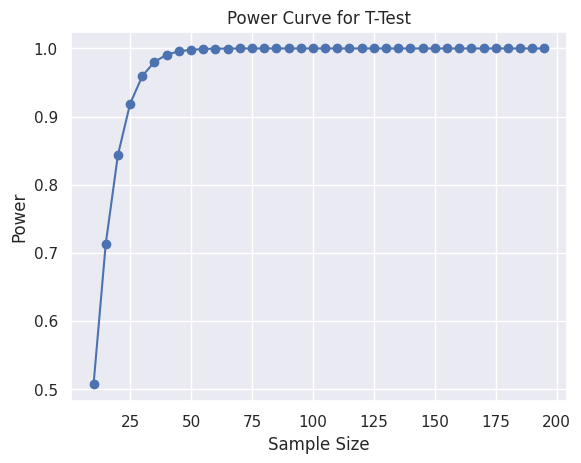

In [ ]:
#power curves
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower


# Initialize TTestPower
power_analysis = TTestPower()

# Define parameters
effect_size = 0.7
alpha = 0.05
sample_sizes = np.arange(10, 200, 5)  # Range of sample sizes

# Calculate power for each sample size
powers = []
for n in sample_sizes:
    power = power_analysis.power(effect_size=effect_size, nobs=n, alpha=alpha, alternative='two-sided')
    powers.append(power)

# Plot power curve
plt.plot(sample_sizes, powers, marker='o')
plt.title('Power Curve for T-Test')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.grid(True)
plt.show()


**Assumption Check**

In [ ]:
!pip install pingouin
import pingouin as pg

In [ ]:
# Assumption 1: Normality of residuals - Model 1 (MMSE)
# Shapiro-Wilk test for normality
shapiro_results = pg.normality(df, dv='MMSE', group='Group', method='shapiro')
print("Shapiro-Wilk test results for normality of residuals:")
print(shapiro_results)

Shapiro-Wilk test results for normality of residuals:
                    W          pval  normal
Group                                      
Nondemented  0.809528  2.635762e-12   False
Demented     0.929083  5.677786e-06   False
Converted    0.770938  5.867723e-05   False


In [ ]:
# Assumption 1: Normality of residuals - Model 2(nWBV)
# Shapiro-Wilk test for normality
shapiro_results = pg.normality(df, dv='nWBV', group='Group', method='shapiro')
print("Shapiro-Wilk test results for normality of residuals:")
print(shapiro_results)

Shapiro-Wilk test results for normality of residuals:
                    W      pval  normal
Group                                  
Nondemented  0.988882  0.317042    True
Demented     0.989974  0.501167    True
Converted    0.958236  0.358018    True


In [ ]:
# Assumption 2: Homogeneity of variances - - Model 1 (MMSE)
# Levene's test for homogeneity of variances
levene_results = pg.homoscedasticity(df, dv='MMSE', group='Group')
print("\nLevene's test results for homogeneity of variances:")
print(levene_results)


Levene's test results for homogeneity of variances:
                W          pval  equal_var
levene  65.187608  4.171861e-24      False


In [ ]:
# Assumption 2: Homogeneity of variances - Model 2(nWBV)
# Levene's test for homogeneity of variances
levene_results = pg.homoscedasticity(df, dv='nWBV', group='Group')
print("\nLevene's test results for homogeneity of variances:")
print(levene_results)


Levene's test results for homogeneity of variances:
               W      pval  equal_var
levene  0.936512  0.393175       True


In [ ]:
# Assumption 3: Sphericity (for within-subjects factor) - Model 1(MMSE)
# Mauchly's test for sphericity
mauchly_results = pg.sphericity(df, dv='MMSE', within='Visit', subject='Subject ID')
print("\nMauchly's test results for sphericity:")
print(mauchly_results)


Mauchly's test results for sphericity:
(True, nan, nan, 1, 1.0)


In [ ]:
# Assumption 3: Sphericity (for within-subjects factor) - Model 2(nWBV)
# Mauchly's test for sphericity
mauchly_results = pg.sphericity(df, dv='nWBV', within='Visit', subject='Subject ID')
print("\nMauchly's test results for sphericity:")
print(mauchly_results)


Mauchly's test results for sphericity:
(True, nan, nan, 1, 1.0)
